In [1]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from scipy.stats import mode
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [13]:
def plot_data(X,y, title = ""):
    x_1 = [sample[0] for sample in X]
    x_2 = [sample[1] for sample in X]
    df = pd.DataFrame()
    df['x_1']=x_1
    df['x_2']=x_2
    df['y']=y
    sns.lmplot(x='x_1', y='x_2', data=df, hue='y', fit_reg = False)
    ax = plt.gca()
    ax.set_title(title)

In [451]:
def condensed_NN(X, y, additional_example_per_iteration = True, random_state = 0):
    X_store = []
    y_store = []
    grabbage_X = X
    grabbage_y = y
    count = -1   
    while(count!= 0 and len(grabbage_X)!=0):
        count = 0
        if(additional_example_per_iteration or (len(X_store)==0 and len(y_store==0))):
            X_store.append(grabbage_X[random.randint(0, len(grabbage_X)-1)])
            y_store.append(grabbage_y[random.randint(0, len(grabbage_y)-1)])
        KN_clf = KNeighborsClassifier(n_neighbors=1)
        KN_clf.fit(X_store, y_store)
        grabbage_index = []
        for index, (X_i, y_i) in enumerate(zip(grabbage_X, grabbage_y)):
            if KN_clf.predict([X_i])[0] != y_i:
                X_store.append(X_i)
                y_store.append(y_i)
                KN_clf.fit(X_store, y_store)
                count += 1
            else:
                grabbage_index.append(index)
        grabbage_X = [grabbage_X[index] for index in grabbage_index]
        grabbage_y = [grabbage_y[index] for index in grabbage_index]
    return X_store, y_store
    

In [452]:
number_of_entry = 160
X = [[random.gauss(2,0.1),random.gauss(2,0.3)] for i in range(int(4*number_of_entry/8)) ]
X += [[random.gauss(2,0.1),random.gauss(3,0.3)] for i in range(int(4*number_of_entry/8))]
y = [0 if i >=number_of_entry/2 else 1 for i in range(number_of_entry)]

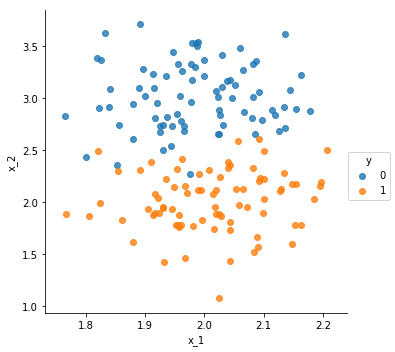

In [453]:
plot_data(X,y)

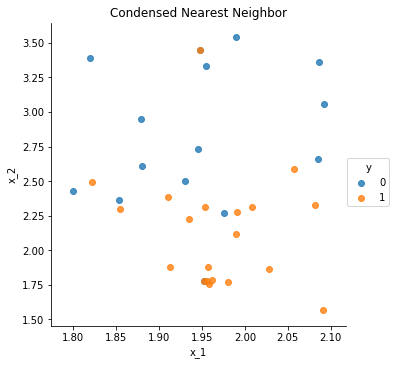

In [454]:
X_T, y_T = condensed_NN(X, y)
plot_data(X_T,y_T, "Condensed Nearest Neighbor")

In [455]:
from imblearn.under_sampling import CondensedNearestNeighbour 

In [456]:
cnn= CondensedNearestNeighbour()
X_res, y_res = cnn.fit_sample(X,y)

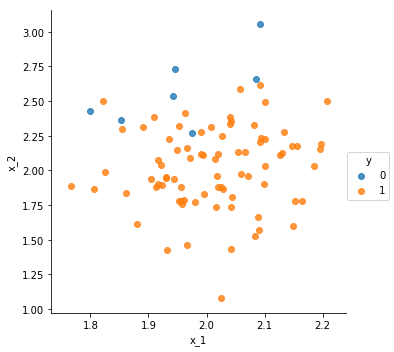

In [457]:
plot_data(X_res,y_res)

In [458]:
number_of_entry = 160
X_test = [[random.gauss(2,0.1),random.gauss(2,0.3)] for i in range(int(4*number_of_entry/8)) ]
X_test += [[random.gauss(2,0.1),random.gauss(3,0.3)] for i in range(int(4*number_of_entry/8))]
y_test = [0 if i >=number_of_entry/2 else 1 for i in range(number_of_entry)]

In [459]:
KN_clf = KNeighborsClassifier(n_neighbors=1)
KN_clf.fit(X_T, y_T)
print(KN_clf.score(X_test, y_test))
KN_clf.fit(X_res, y_res)
print(KN_clf.score(X_test, y_test))

0.91875
0.9375


0.99375 Total point:17
1.0 Total point:42


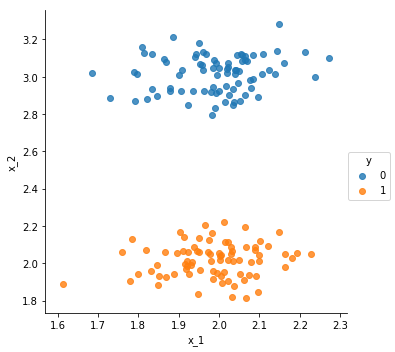

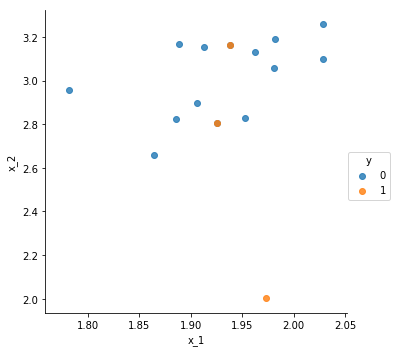

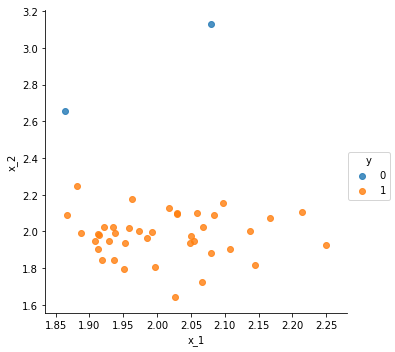

In [460]:
number_of_entry = 160
X = [[random.gauss(2,0.1),random.gauss(2,0.15)] for i in range(int(2*number_of_entry/8)) ]
X += [[random.gauss(2,0.1),random.gauss(3,0.15)] for i in range(int(6*number_of_entry/8))]
y = [0 if i >=number_of_entry/4 else 1 for i in range(number_of_entry)]
X_T, y_T = condensed_NN(X, y)
cnn= CondensedNearestNeighbour()
X_res, y_res = cnn.fit_sample(X,y)
number_of_entry = 160
X_test = [[random.gauss(2,0.1),random.gauss(2,0.1)] for i in range(int(4*number_of_entry/8)) ]
X_test += [[random.gauss(2,0.1),random.gauss(3,0.1)] for i in range(int(4*number_of_entry/8))]
y_test = [0 if i >=number_of_entry/2 else 1 for i in range(number_of_entry)]
plot_data(X_test,y_test)

KN_clf = KNeighborsClassifier(n_neighbors=1)
KN_clf.fit(X_T, y_T)
print(KN_clf.score(X_test, y_test), "Total point:{0}".format(len(X_T)))
KN_clf.fit(X_res, y_res)
print(KN_clf.score(X_test, y_test), "Total point:{0}".format(len(X_res)))
plot_data(X_T,y_T)
plot_data(X_res,y_res)